In [4]:
'''from matplotlib import pyplot as plt
%matplotlib inline
import torch


def test(pipeline):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    pipeline = pipeline.to(device)

    images = pipeline(batch_size=8,
                      num_inference_steps=1000,
                      output_type='numpy').images

    pipeline.to('cpu')
    torch.cuda.empty_cache()

    images = (images * 255).round().astype('uint8')

    plt.figure(figsize=(10, 5))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()'''

"from matplotlib import pyplot as plt\n%matplotlib inline\nimport torch\n\n\ndef test(pipeline):\n    device = 'cuda' if torch.cuda.is_available() else 'cpu'\n    pipeline = pipeline.to(device)\n\n    images = pipeline(batch_size=8,\n                      num_inference_steps=1000,\n                      output_type='numpy').images\n\n    pipeline.to('cpu')\n    torch.cuda.empty_cache()\n\n    images = (images * 255).round().astype('uint8')\n\n    plt.figure(figsize=(10, 5))\n    for i in range(8):\n        plt.subplot(2, 4, i + 1)\n        plt.imshow(images[i])\n        plt.axis('off')\n\n    plt.show()"

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import torch

def test(pipeline):
    # 指定使用 GPU 1
    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
    pipeline = pipeline.to(device)

    # 确保所有计算都在指定的设备上进行
    with torch.cuda.device(device):
        images = pipeline(batch_size=16,
                          num_inference_steps=1000,
                          output_type='numpy').images

    pipeline.to('cpu')
    torch.cuda.empty_cache()

    # 将图像数据转换为 uint8 类型，以便于显示
    images = (images * 255).round().astype('uint8')

    plt.figure(figsize=(10, 5))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

# 假设 pipeline 是一个已经定义好的模型或者处理流程
# test(your_pipeline)

In [6]:
from diffusers import DDPMPipeline, UNet2DModel, DDPMScheduler

#定义模型,随机初始化参数
model = UNet2DModel(
    sample_size=64,
    in_channels=3,
    out_channels=3,
    layers_per_block=3,#2
    block_out_channels=(128, 128, 256, 256, 512, 512),
    down_block_types=(
        'DownBlock2D',
        'DownBlock2D',
        'DownBlock2D',
        'DownBlock2D',
        'AttnDownBlock2D',
        'DownBlock2D',
    ),
    up_block_types=(
        'UpBlock2D',
        'AttnUpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
    ),
)

#初始化工具类
scheduler = DDPMScheduler(num_train_timesteps=1000,
                          beta_schedule='linear',
                          prediction_type='epsilon')



Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

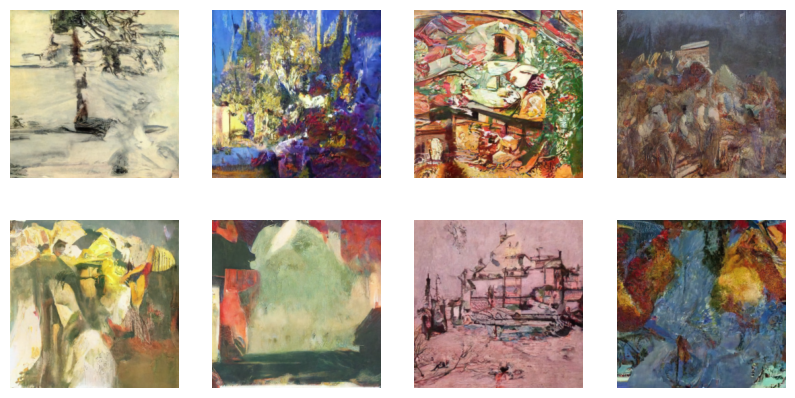

In [7]:
test(DDPMPipeline.from_pretrained('./ddpm-church-finetune-wikiart-256'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

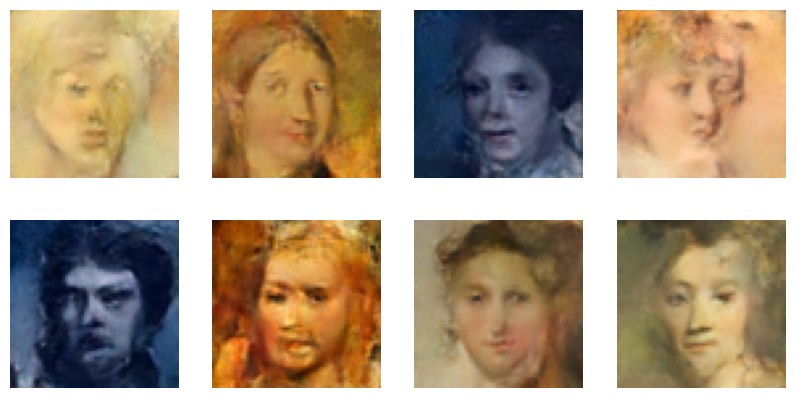

In [12]:
test(DDPMPipeline.from_pretrained('./sd-class-metfaces-64-clean'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

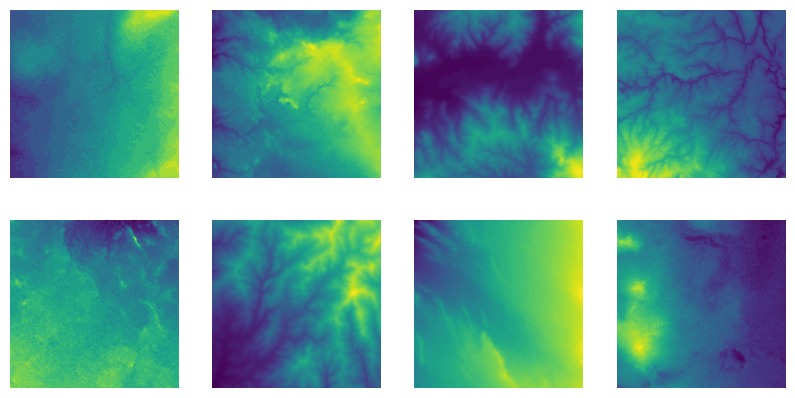

In [13]:
test(DDPMPipeline.from_pretrained('ddpm-ema-heightmap-512-10m'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

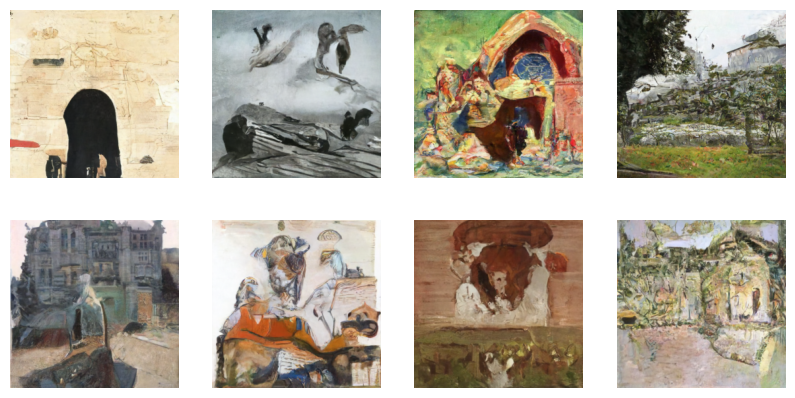

In [14]:
test(DDPMPipeline.from_pretrained('ddpm-church-finetune-wikiart-256'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

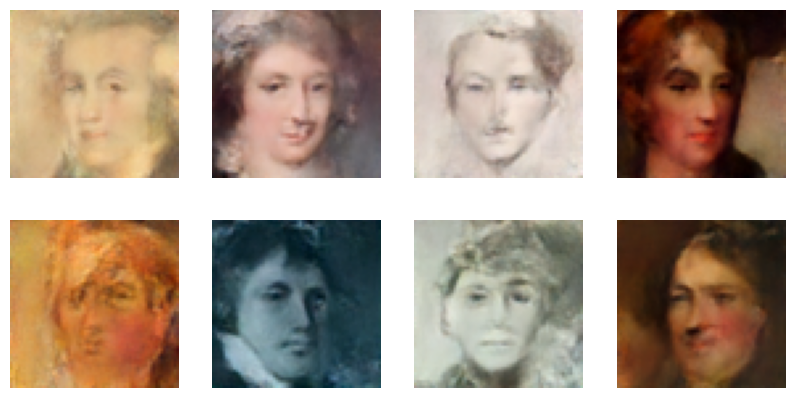

In [16]:
test(DDPMPipeline.from_pretrained('sd-class-metfaces-64-clean'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

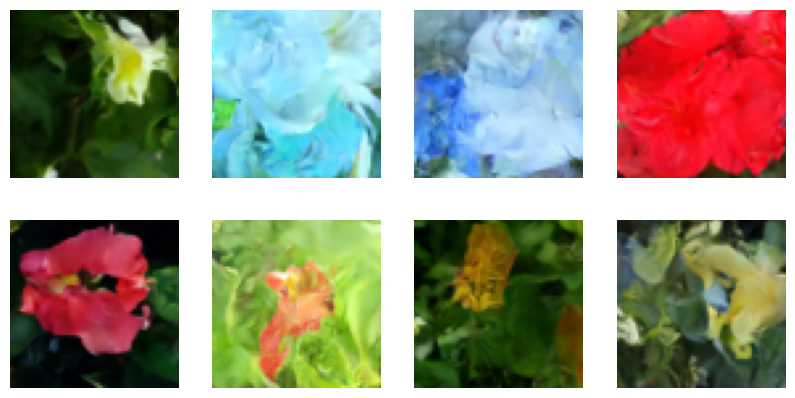

In [15]:
test(DDPMPipeline.from_pretrained('ddpm-ema-flowers-64-test'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

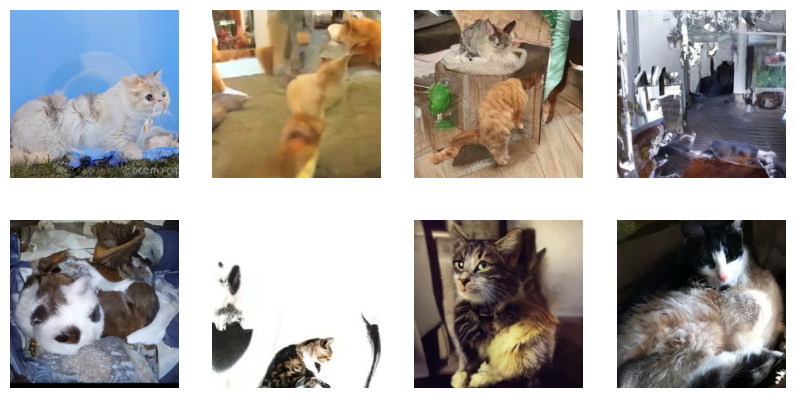

In [17]:
test(DDPMPipeline.from_pretrained('ddpm-ema-cat-256'))

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

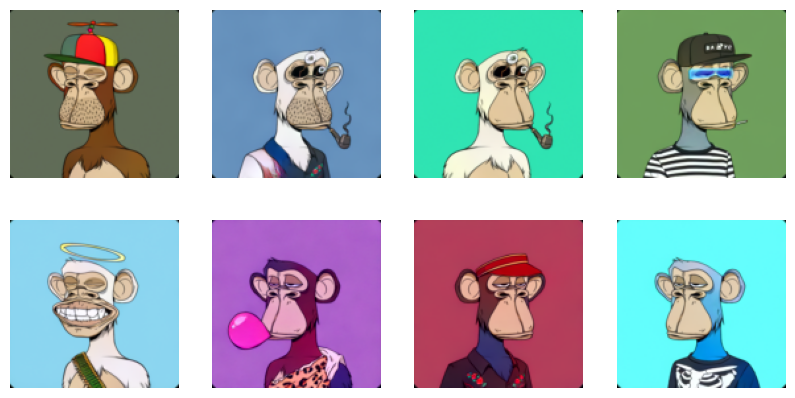

In [18]:
test(DDPMPipeline.from_pretrained('ddpm-bored-apes-128'))